<a href="https://colab.research.google.com/github/DuplamenteH/COVID-Alura/blob/main/covid_TS_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as  plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')

## Aula 01

In [ ]:
path = 'https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv'
df_total = pd.read_csv(path, sep=',')
df_total.head()

In [ ]:
df_total.info()

In [ ]:
df = df_total[df_total['estado']!= 'TOTAL']
df['data']= pd.to_datetime(df_total['data']).dt.date
df.head()

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title("Óbitos por estado em função do tempo", loc='left',fontsize=24)
fig.set_xlabel("DATA",fontsize=21)
fig.set_ylabel("ÓBITOS",fontsize=21);

In [ ]:
df_sp =df[df['estado'] == 'SP']
df_sp.head()

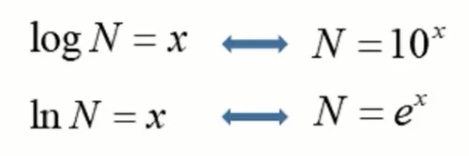

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title("Óbitos por estado em função do tempo", loc='left',fontsize=24)
fig.set_xlabel("DATA",fontsize=21)
fig.set_ylabel("LOG ÓBITOS",fontsize=21);
fig.set_yscale('log')

exercicio

In [ ]:
#visualização precaria.
#plt.figure(figsize=(20,8))
#fig = sns.barplot(x='data',y='Obitos',hue='estado',data=df)
#fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24)
#fig.set_xlabel('Data',fontsize=24)
#fig.set_ylabel('Óbitos',fontsize=24);

## Aula 02

In [ ]:
df_sp.head()

In [ ]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data,df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data,df_sp.Obitos, label='Obitos')
plt.xlabel('Data' ,fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP' ,fontsize=24,rotation=90)
plt.legend();

Não posso aplicar as mesmas análises que eu aplicaria a partir de julho em maio porque a metodologia de aquisição desses dados é diferente. E por outro lado, os dados dos recuperados em junho no estado de São Paulo não foram divulgados. Não sabemos se foram adquiridos e não foram divulgados ou se eles não foram computados.
<br/>Isso não significa que não houve nenhum recuperado. Não é isso. Significa apenas que não temos esses dados. Isso é uma conclusão que deve ser tomada a partir do momento em que temos os dados. Como não temos, a única coisa que podemos fazer é informar que de fato não temos acesso a esses dados.<br/>
O que podemos ver é exatamente que a partir de julho temos um aumento considerável dos recuperados, uma vez que os pacientes que tinham sintomas leves e sendo tratados em casa ou no hospital e não estavam em uma UTI, começaram a ser contabilizados também.

In [ ]:
def plot_line(x,y,titulo,xlabel,ylabel,data,hue):
    #plt.figure(figsize=(20,8))
    ax = sns.lineplot(x=x, y=y, hue=hue, data=data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=18)
    ax.set_ylabel(ylabel,fontsize=18, rotation=90);


In [ ]:
def plot_bar(x,y,titulo,xlabel,ylabel,data):
    plt.figure(figsize=(21,10))
    ax = plt.bar(data[x],data[y])
    plt.title(titulo, loc='left',fontsize=20)
    plt.xlabel(xlabel ,fontsize=18)
    plt.ylabel(ylabel,fontsize=24,rotation=90)

In [ ]:
plot_bar(titulo='Novos casos em SP',x='data',y='novosCasos',xlabel='DATA',ylabel='Novos casos',data=df_sp)

In [ ]:
df_sp['aceleracao_Casos'] = df_sp['novosCasos'].diff()

In [ ]:
df_sp['aceleracao_Obitos'] = df_sp['novosObitos'].diff()

In [ ]:
df_sp.head()

In [ ]:
plot_bar(titulo='Acelaração obitos em SP',x='data',y='aceleracao_Obitos',xlabel='DATA',ylabel='Acelaração de obitos',data=df_sp)

media movel e subnotificação, <br/>
sazionalidade => é quando os dados variam com uma função temporal.

In [ ]:
# media movel pegamos uma janela de dados e tiramos a media ao longo dessa janela de tempo

df_sp['media_obitos'] = df_sp.novosObitos.rolling(window=7, center=False).mean()
df_sp['media_Obitdos_14']=df_sp.novosObitos.rolling(window=14, center=False).mean()
df_sp.head(15)

In [ ]:
plt.figure(figsize=(20,8))
plot_line(titulo='Media movel de obitos em SP', x='data',y='media_obitos',xlabel='DATA', ylabel='Média',data=df_sp,hue=None)
plot_line(titulo='Media movel de obitos em SP', x='data',y='media_Obitdos_14',xlabel='DATA', ylabel='Média',data=df_sp,hue=None)

plt.bar(df_sp['data'],df_sp['novosObitos'], color='lightgrey');


## Aula 03 Correlação e autocorrelação

O coeficiente de correlação de Pearson que mede a dependência linear entre duas variáveis.


In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
ax = plt.figure(figsize=(18,10))
ax.suptitle("Correlação dos óbitos", fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['Obitos']);

In [ ]:
ax = plt.figure(figsize=(18,10))
ax.suptitle("Correlação dos novos óbitos", fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['novosObitos']);

In [ ]:
ax = plt.figure(figsize=(18,10))
ax.suptitle("Correlação dos novos obitos media movel ", fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['media_obitos'][7:]);

In [ ]:
ax = plt.figure(figsize=(18,10))
ax.suptitle("Correlação dos novos obitos aceleração ", fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['aceleracao_Obitos'][1:]);

In [ ]:
#ex
df_sp['mediaAccObitos'] = df_sp['aceleracao_Obitos'][1:].rolling(window=7,center=False).mean()

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da média da aceleração de óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['mediaAccObitos'][7:])
ax=ax

## Aula 04

Sazionalidade: Sazonalidade é quando temos uma variável que tem um comportamento muito parecido e repetitivo ao longo de um determinado período de tempo.<br/>
Por exemplo, Black Friday. Então todos os anos na época da Black Friday temos um aumento de vendas. A mesma coisa acontece com vendas de passagens aéreas no natal ou casos de gripe na época do inverno. Esses três exemplos são casos de sazonalidade anual.Ou seja, temos uma autocorrelação alta entre esses períodos e essa variação se dá exatamente ao longo de um ano. No caso desses dados que temos da Covid, percebemos que temos uma autocorrelação alta ao longo da semana. Então se comparamos dados de uma quarta-feira com o da quarta-feira passada, temos um valor maior do que se compararmos o de quarta-feira com o de domingo, por exemplo.

In [ ]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

In [ ]:
# Dic dos dias da semana
dias_traduzidos = {'Monday' : 'Segunda' , 
                   'Tuesday' : 'Terça' , 
                   'Wednesday' : 'Quarta' , 
                   'Thursday' : 'Quinta' , 
                   'Friday' : 'Sexta' , 
                   'Saturday' : 'Sábado' , 
                   'Sunday' : 'Domingo'
                   }

In [ ]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

In [ ]:
df_sp.head()

In [ ]:
group = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracao_Obitos'].mean().round()

In [ ]:
group['dia_da_semana'] = group.index

In [ ]:
group.head(7)

In [ ]:
group = group.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado'])

In [ ]:
group.index

In [ ]:
sns.barplot(group.dia_da_semana,group.novosObitos);

In [ ]:
"""
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df.mes.dt.weekday
    df['diames'] = df.mes.dt.day
    df['mes'] = df.mes.dt.month


    X = df[['diasemana', 'mes', 'diames']]

    if label:
        y= df[label]
        return X, y
    return X
"""
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    df['semana'] = df['mes'].dt.weekofyear

    X = df[['diasemana','mês','diamês','semana']]

    if label:
        y = df[label]
        return X,y
    return X

In [ ]:
X ,y = criar_features(df_sp,label='Obitos')

In [ ]:
df_final = pd.concat([X,y],axis=1)

In [ ]:
df_final.head(10)

In [ ]:
plt.figure(figsize=(20,8))
g = sns.lineplot(x='semana',y='Obitos',data=df_final)

g.axes.set_xlabel('Semana do ano',fontsize=15)
g.axes.set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por semana',fontsize=15);

grafico


In [ ]:
g = sns.pairplot(df_final.dropna(),
                 hue='mês',
                 x_vars =['diasemana','diamês','mês','semana'],
                 y_vars='Obitos')

g.fig.set_size_inches(15,8)
g.axes[0,0].set_xlabel("Dia da semana",fontsize=15)
g.axes[0,1].set_xlabel("Dia do mes",fontsize=15)
g.axes[0,2].set_xlabel("Mes",fontsize=15)
g.axes[0,3].set_xlabel("Semana",fontsize=15)
g.axes[0,0].set_ylabel("Obitos",fontsize=15)

plt.suptitle("Obitos por dia da semana, do mes e por mes", fontsize=15)
plt.show()